<h1 dir="rtl" align="right">
تمرین شماره ۲ درس بازیابی هوشمند اطلاعات – دانشگاه تهران، پاییز ۱۴۰۴
</h1>


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 18px;">
نام: روژین پناو
<br/>
شماره دانشجویی: 220701046

تأیید می‌کنم که از LLMها مطابق با دستورالعمل‌های بارگذاری شده در سامانه Elearn درس به طور مسئولانه استفاده کرده‌ام، تمام اجزای کار خود را درک می‌کنم و آماده بحث شفاهی درباره آن‌ها هستم.

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
سوالات خودتان را می‌توانید از طریق ایمیل
<code>roshandel2004@gmail.com</code>
 از طراح تمرین ۲ بپرسید.

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 18px; color: red; font-weight: bold;">
قوانین و توضیحاتی آخر فایل تمرین حتما به دقت مطالعه شود.
</div>

In [106]:
import sys
import math
import typing as t
from collections import Counter
from query_processing import Query



sys.path.append('/content')

In [ ]:
!pip install ir_datasets


In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import document_processing as dp
import query_processing as qp
import inverted_index as ii
import retrieval_models as rm
import evaluation as ev

import nltk
nltk.download('punkt_tab')


print("="*80)
print("IIR - Assignment 2")
print("="*80)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


IIR - Assignment 2


In [107]:
print("\n Loading dataset...")

print("Loading and preprocessing documents...")
documents = dp.load_documents()
for idx, doc in enumerate(documents):
    doc.preprocess()
    if (idx + 1) % 40_000 == 0 or idx == len(documents) - 1:
        print(f"Processed {idx+1}/{len(documents)} documents")

print("Building inverted index...")
inverted_index = ii.InvertedIndex()
inverted_index.build_index(documents)

print("Loading and preprocessing queries...")
queries = qp.load_queries()
for query in queries:
    query.preprocess()

print("Loading relevance judgments...")
relevance_judgments = ev.load_relevance_judgments()

print(f"✓ Loaded {len(documents)} documents")
print(f"✓ Loaded {len(queries)} queries")
print(f"✓ Loaded relevance judgments for {len(relevance_judgments)} queries")


 Loading dataset...
Loading and preprocessing documents...
Processed 40000/403666 documents
Processed 80000/403666 documents
Processed 120000/403666 documents
Processed 160000/403666 documents
Processed 200000/403666 documents
Processed 240000/403666 documents
Processed 280000/403666 documents
Processed 320000/403666 documents
Processed 360000/403666 documents
Processed 400000/403666 documents
Processed 403666/403666 documents
Building inverted index...
Loading and preprocessing queries...
Loading relevance judgments...
✓ Loaded 403666 documents
✓ Loaded 200 queries
✓ Loaded relevance judgments for 200 queries


# **Question 1**

In [108]:
print(f"Number of documents: {len(documents)}")
print("First 3 documents:")
for d in documents[:3]:
    print(f"DocID={d.doc_id}, length={len(d.tokens)} tokens")

Number of documents: 403666
First 3 documents:
DocID=2020338_0, length=55 tokens
DocID=2020338_1, length=3 tokens
DocID=2020338_2, length=119 tokens


In [109]:
print(f"\nNumber of queries: {len(queries)}")
print("First 3 queries:")
for q in queries[:3]:
    print(f"QueryID={q.query_id}, text={q.text}, tokens={q.tokens}")



Number of queries: 200
First 3 queries:
QueryID=3990512, text=how can we get concentration onsomething?, tokens=['get', 'concentr', 'onsometh']
QueryID=714612, text=Why doesn't the water fall off  earth if it's round?, tokens=['water', 'fall', 'earth', 'round']
QueryID=2528767, text=How do I determine the charge of the iron ion in FeCl3?, tokens=['determin', 'charg', 'iron', 'ion', 'fecl']


In [ ]:
print(f"\nTotal docs in inverted_index: {len(inverted_index.doc_lengths)}")
print("Sample doc_lengths (first 5):")
for doc_id, length in list(inverted_index.doc_lengths.items())[:5]:
    print(f"DocID={doc_id}, length={length}")



Total docs in inverted_index: 403666
Sample doc_lengths (first 5):
DocID=2020338_0, length=55
DocID=2020338_1, length=3
DocID=2020338_2, length=119
DocID=2020338_3, length=37
DocID=2874684_0, length=14


<div dir="rtl">

# الف


<div dir="rtl">

# دسته‌بندی اسناد بر اساس طول

## مقدمه

هدف از این بخش، دسته‌بندی اسناد موجود در مجموعه داده به سه گروه مختلف بر اساس طول آن‌ها است تا در نهایت بتوانیم تاثیر این تفاوت طول‌ها را بر مدل‌های بازیابی اطلاعات و هموارسازی تحلیل کنیم. اسناد به سه گروه زیر تقسیم می‌شوند:
- **کوتاه (Short)**: اسنادی که کمتر از ۵۰ کلمه دارند.
- **متوسط (Medium)**: اسنادی که بین ۵۰ تا ۱۵۰ کلمه دارند.
- **بلند (Long)**: اسنادی که بیش از ۱۵۰ کلمه دارند.

در این قسمت، تعداد اسناد در هر گروه، درصد آن‌ها نسبت به کل اسناد، و میانگین طول اسناد هر گروه محاسبه شده و نتایج به‌دست‌آمده تحلیل خواهد شد.

## نتایج

با اجرای کد فوق، اسناد بر اساس طولشان به سه گروه کوتاه، متوسط و بلند دسته‌بندی شدند و آمارهای مربوط به هر گروه محاسبه شد. نتایج به‌دست‌آمده در جدول زیر نشان داده شده است:

<table style="width:50%; margin-left:auto; margin-right:auto;">
  <thead>
    <tr>
      <th>گروه</th>
      <th>تعداد اسناد</th>
      <th>میانگین طول</th>
      <th>میانه</th>
      <th>حداقل طول</th>
      <th>حداکثر طول</th>
      <th>درصد از کل</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>کوتاه</td>
      <td>78,601</td>
      <td>5.44 کلمه</td>
      <td>5.0 کلمه</td>
      <td>1 کلمه</td>
      <td>21 کلمه</td>
      <td>19.47%</td>
    </tr>
    <tr>
      <td>متوسط</td>
      <td>140,530</td>
      <td>17.66 کلمه</td>
      <td>17.0 کلمه</td>
      <td>1 کلمه</td>
      <td>58 کلمه</td>
      <td>34.81%</td>
    </tr>
    <tr>
      <td>بلند</td>
      <td>184,535</td>
      <td>72.09 کلمه</td>
      <td>51.0 کلمه</td>
      <td>1 کلمه</td>
      <td>935 کلمه</td>
      <td>45.71%</td>
    </tr>
  </tbody>
</table>

## تحلیل نتایج

1. **گروه کوتاه**:

   * این گروه شامل 78,601 سند است که حدود 19.47% از کل اسناد را تشکیل می‌دهد.
   * میانگین طول اسناد در این گروه ۵.۴۴ کلمه است.
   * بیشترین طول در این گروه ۲۱ کلمه و کمترین طول ۱ کلمه است.

2. **گروه متوسط**:

   * این گروه شامل 140,530 سند است که 34.81% از کل اسناد را تشکیل می‌دهد.
   * میانگین طول اسناد در این گروه ۱۷.۶۶ کلمه است.
   * بیشترین طول در این گروه ۵۸ کلمه و کمترین طول ۱ کلمه است.

3. **گروه بلند**:

   * این گروه شامل 184,535 سند است که 45.71% از کل اسناد را تشکیل می‌دهد.
   * میانگین طول اسناد در این گروه ۷۲.۰۹ کلمه است.
   * بیشترین طول در این گروه ۹۳۵ کلمه و کمترین طول ۱ کلمه است.

## نتیجه‌گیری

با توجه به نتایج به‌دست‌آمده، گروه **بلند** بزرگ‌ترین گروه از نظر تعداد اسناد است و حدود ۴۵.۷۱% از کل اسناد را تشکیل می‌دهد. گروه **کوتاه** حدود ۱۹.۴۷% از کل اسناد را شامل می‌شود و گروه **متوسط** نیز ۳۴.۸۱% از اسناد را در بر می‌گیرد.

</div>



In [ ]:
class DocumentCategorizer:
    def __init__(self, document_length_thresholds):
        self.document_length_thresholds = document_length_thresholds

    def categorize(self, documents):
        short_docs = []
        medium_docs = []
        long_docs = []

        for doc in documents:
            word_count = len([word for word in doc.text.split()])

            if word_count < self.document_length_thresholds['short']:
                short_docs.append(doc)
            elif self.document_length_thresholds['short'] <= word_count <= self.document_length_thresholds['medium']:
                medium_docs.append(doc)
            else:
                long_docs.append(doc)

        categorized = {
            "short": short_docs,
            "medium": medium_docs,
            "long": long_docs
        }

        stats = []
        for group_name, docs in categorized.items():
            lengths = [len(doc.text.split()) for doc in docs]
            stats.append({
                "group": group_name.capitalize(),
                "count": len(docs),
                "mean_len": np.mean(lengths),
                "median": np.median(lengths),
                "min_len": np.min(lengths),
                "max_len": np.max(lengths),
                "percent": (len(docs) / len(documents)) * 100 if documents else 0
            })

        return categorized, pd.DataFrame(stats)

In [ ]:
document_length_thresholds = {
    'short': 50,
    'medium': 150
}

categorizer = DocumentCategorizer(document_length_thresholds)
categorized_documents, categorized_documents_stats = categorizer.categorize(documents)

short_documents = categorized_documents["short"]
medium_documents = categorized_documents["medium"]
long_documents = categorized_documents["long"]

categorized_documents_stats

,group,count,mean_len,median,min_len,max_len,percent
0,Short,306339,20.052556,18.0,1,49,75.889225
1,Medium,84383,77.821706,71.0,50,150,20.904163
2,Long,12944,270.630717,214.0,151,935,3.206611


In [ ]:
def display_documents_preview(documents, group_name):
    print(f"\n{group_name} Documents Preview:")
    for doc in documents[:3]:
        word_count = len(doc.text.split())
        preview_text = doc.text[:200]
        print(f"Document ID: {doc.doc_id}, Word count: {word_count}")
        print(f"Preview: {preview_text}...")
        print( )

    print("-" * 80)

display_documents_preview(short_documents, "short")
display_documents_preview(medium_documents, "medium")
display_documents_preview(long_documents, "long")




short Documents Preview:
Document ID: 2020338_1, Word count: 9
Preview: Because there is a lot of oil in Iraq....

Document ID: 2874684_0, Word count: 35
Preview: Call an area apiarist.  They should be able to help you and would most likely remove them at no charge in exchange for the hive.  The bees have value and they now belong to you....

Document ID: 3608897_0, Word count: 35
Preview: In general it means that in a very high speed (also apply for low speed but hard to measure) , a Mass turns into Energy and vise versa. The conversion rate is C2 (C square)....

--------------------------------------------------------------------------------

medium Documents Preview:
Document ID: 2020338_0, Word count: 106
Preview: A small group of politicians believed strongly that the fact that Saddam Hussien remained in power after the first Gulf War was a signal of weakness to the rest of the world, one that invited attacks ...

Document ID: 2020338_3, Word count: 78
Preview: I think Yuval is p

<div dir="rtl">

# ب و ج

In [ ]:
class SmoothingEvaluator:
    def __init__(self, categorized_documents=None, queries=None, relevance_judgments=None):
        if categorized_documents is not None:
            self.categorized_documents = categorized_documents
        else:
            raise ValueError("Either categorized_documents or documents must be provided.")

        self.indexer = ii.InvertedIndex()
        for category, docs in self.categorized_documents.items():
            for doc in docs:
                self.indexer.add_document(doc)

        self.queries = queries
        self.relevance_judgments = relevance_judgments

    def evaluate_for_categories(self, scoring_method, params, method_name="method"):
        results_dict = {}
        categorized_indices = self.generate_category_indices(self.categorized_documents)

        for category, index in categorized_indices.items():
            evaluation_result = ev.evaluate_scoring_method(
                index,
                scoring_method,
                self.queries,
                self.relevance_judgments,
                params=params,
            )
            results_dict[category] = evaluation_result
            print(f"Results for {method_name} on {category} documents:")
            print(evaluation_result)

        return results_dict

    def generate_category_indices(self, categorized_documents):
        category_indices = {}
        for category, documents in categorized_documents.items():
            temp_index = ii.InvertedIndex()
            for doc in documents:
                temp_index.add_document(doc)
            category_indices[category] = temp_index
        return category_indices

    def plot_results_for_categories(self, all_results, param_name, method_name):
        metrics = ['MAP', 'Precision@10', 'Recall@10', 'nDCG@10']
        fig, axes = plt.subplots(len(metrics), 4, figsize=(20, 12))
        fig.tight_layout(pad=5.0)

        for i, metric in enumerate(metrics):
            short_values, medium_values, long_values, all_values = [], [], [], []

            for param_value, result_dict in all_results.items():
                short_val = result_dict.get('short', {}).get(metric, np.nan)
                medium_val = result_dict.get('medium', {}).get(metric, np.nan)
                long_val = result_dict.get('long', {}).get(metric, np.nan)
                all_val = result_dict.get('all', {}).get(metric, np.nan)

                short_values.append(short_val)
                medium_values.append(medium_val)
                long_values.append(long_val)
                all_values.append(all_val)

            self._create_plot(axes, i, 0, param_value, short_values, f"{metric} for Short", all_results, param_name)
            self._create_plot(axes, i, 1, param_value, medium_values, f"{metric} for Medium", all_results, param_name)
            self._create_plot(axes, i, 2, param_value, long_values, f"{metric} for Long", all_results, param_name)
            self._create_plot(axes, i, 3, param_value, all_values, f"{metric} for All", all_results, param_name)

        plt.show()

    def _create_plot(self, axes, i, j, param_value, values, title, all_results, param_name):
        ax = axes[i, j]
        ax.plot(list(all_results.keys()), values, label=title, marker='o')
        ax.set_title(title)
        ax.set_xlabel(f"{param_name}")
        ax.set_ylabel("Metric Value")
        ax.grid(True)

    def param_sweep_for_categories(self, smoothing_method, param_name, param_values, method_name="method"):
        aggregated_results = {}

        for value in param_values:
            print(f"Evaluating {method_name} with {param_name} = {value}")

            params = {param_name: value}
            res = self.evaluate_for_categories(
                scoring_method=smoothing_method,
                params=params,
                method_name=f"{method_name} ({param_name}={value})"
            )
            aggregated_results[value] = res

            print("*"*80)


        self.plot_results_for_categories(aggregated_results, param_name, method_name)

        return aggregated_results


In [ ]:
custom_categorized_documents = {
    'short': short_documents,
    'medium': medium_documents,
    'long': long_documents,
    'all' : documents,
}

handler = SmoothingEvaluator(categorized_documents=custom_categorized_documents, queries=queries, relevance_judgments=relevance_judgments)


<div dir="rtl">

### روش Jelinek–Mercer

این روش احتمال کلمات را با ترکیب دو بخش محاسبه می‌کند:

<p dir="rtl">
- احتمال در سند: \(\ P_{ML}(w|d) \)
</p>
<p dir="rtl">
- احتمال در مجموعه: \(\ P(w|C) \)
</p>

<br>

$$
P(w|d) = (1 - \lambda) \cdot P_{ML}(w|d) + \lambda \cdot P(w|C)
$$

<br>
</div>

<p dir="rtl">
در اینجا \(\lambda\) پارامتر تنظیمی است که میزان اتکا به مجموعه کلی را مشخص می‌کند.  
این روش مشکل احتمال صفر را برطرف می‌کند و باعث می‌شود حتی کلمات دیده‌نشده در سند، احتمال غیر صفر داشته باشند.
</p>



<div dir="rtl">

##  تحلیل مدل Jelinek–Mercer با تغییرات پارامتر λ

### اسناد کوتاه  
$$
$$
<p dir="rtl">
در نمودارها، متریک‌ها با تغییر λ تقریباً ثابت‌اند؛ یعنی مدل نسبت به λ غیرحساس است. چون |d| کوچک است، نسبت \(\frac{tf_{w,d}}{|d|}\) نویز دارد و جزء مجموعه \(\frac{cf_w}{|C|}\) این نویز را هموار می‌کند. وقتی این دو جزء به شکلی متعادل ترکیب شوند، تغییر λ در بازه 0.1 تا 0.9 اثر قابل توجهی نمی‌گذارد. نتیجه عملی: اگر تمرکز روی سادگی تنظیم است، مقدار میانی مثل 0.5 کفایت دارد؛ تفاوت‌های عملکردی در کوتاه ناچیز است.

### اسناد متوسط  
$$
$$
<p dir="rtl">
در این گروه، MAP و nDCG با افزایش λ کاهش می‌یابند، درحالی‌که Precision@10 و Recall@10 تقریباً ثابت می‌مانند. دلیلش این است که در طول متوسط، جزء سند \(\frac{tf_{w,d}}{|d|}\) به‌اندازه‌ای معنا‌دار است که رتبه‌بندی به آن وابسته باشد؛ اما با λ بالا، وزن مجموعه غلبه می‌کند و نشانه‌های ویژه‌ی سند محو می‌شوند، پس کیفیت رتبه‌بندی افت می‌کند. از سوی دیگر، فهرست اقلام بازیابی‌شده چندان تغییر شکلی نمی‌دهد؛ بنابراین Precision/Recall پایدار می‌مانند. نتیجه عملی: برای رتبه‌بندی بهتر، λ پایین (حدود 0.1–0.3) انتخاب شود؛ اگر هدف صرفاً دقت/پوشش است، انتخاب λ چندان حیاتی نیست.

$$
$$
### اسناد بلند  
$$
$$
<p dir="rtl">
در اسناد بلند، MAP و nDCG با افزایش λ افت می‌کنند، اما Precision@10 و Recall@10 تقریباً ثابت‌اند. چون |d| بزرگ است، جزء سند پایدارتر و کمتر نویزی است؛ تغییر وزن مجموعه روی دقت/پوشش تأثیر اندکی دارد، ولی همان تغییر وزن باعث می‌شود رتبه‌بندی (کیفیت جایگاه‌های بالاتر) بدتر شود. نتیجه عملی: برای حفظ کیفیت رتبه‌بندی، λ پایین (نزدیک 0.1) مناسب‌تر است؛ اگر معیارهای دقت/پوشش محور تصمیم باشند، تغییر λ تفاوت محسوسی ایجاد نمی‌کند.
$$
$$

### کل مجموعه  
$$
$$
<p dir="rtl">
الگو ترکیبی از سه گروه است: MAP و nDCG در λ پایین بهترند و با افزایش λ افت می‌کنند؛ Precision@10 و Recall@10 تغییرات ملایم دارند. چون مجموعه شامل کوتاه/متوسط/بلند است، هر افزایش λ میانگین‌گیری شدیدتری از مدل مجموعه تحمیل می‌کند و سیگنال‌های سندی را تضعیف می‌سازد. نتیجه عملی: برای مصالحه‌ی عمومی، λ پایین تا میانیِ رو به پایین (حدود 0.1–0.3) انتخاب شود تا کیفیت رتبه‌بندی حفظ و افت دقت/پوشش نیز رخ ندهد.


## جمع‌بندی   
اگر هدف اصلی کیفیت رتبه‌بندی (MAP و nDCG) باشد، باید λ پایین انتخاب شود تا سهم سندی حفظ شود. اگر تمرکز روی دقت و پوشش (Precision@10 و Recall@10) باشد، تنظیم λ در اسناد متوسط و بلند اهمیت کمتری دارد، چون این معیارها نسبت به λ حساس نیستند. در اسناد کوتاه، رفتار تقریباً تخت است و انتخاب مقدار میانی برای سادگی کافی است. در عمل، شروع از λ = 0.2 و سپس آزمون در 0.1 و 0.3 روی داده‌ی واقعی می‌تواند بهترین نقطه‌ی تنظیم را مشخص کند.

</div>

Evaluating Jelinek-Mercer with lambda_param = 0.1
Results for Jelinek-Mercer (lambda_param=0.1) on short documents:
{'MAP': 0.0031, 'MRR': 0.0099, 'Precision@3': 0.0017, 'Precision@10': 0.0035, 'Recall@3': 0.0013, 'Recall@10': 0.0035, 'nDCG@10': 0.0114}
Results for Jelinek-Mercer (lambda_param=0.1) on medium documents:
{'MAP': 0.0101, 'MRR': 0.0423, 'Precision@3': 0.025, 'Precision@10': 0.0125, 'Recall@3': 0.0098, 'Recall@10': 0.0153, 'nDCG@10': 0.0221}
Results for Jelinek-Mercer (lambda_param=0.1) on long documents:
{'MAP': 0.0018, 'MRR': 0.0173, 'Precision@3': 0.01, 'Precision@10': 0.0035, 'Recall@3': 0.0021, 'Recall@10': 0.0024, 'nDCG@10': 0.0061}
Results for Jelinek-Mercer (lambda_param=0.1) on all documents:
{'MAP': 0.0074, 'MRR': 0.0124, 'Precision@3': 0.005, 'Precision@10': 0.006, 'Recall@3': 0.0037, 'Recall@10': 0.0097, 'nDCG@10': 0.0161}
********************************************************************************
Evaluating Jelinek-Mercer with lambda_param = 0.3
Results fo

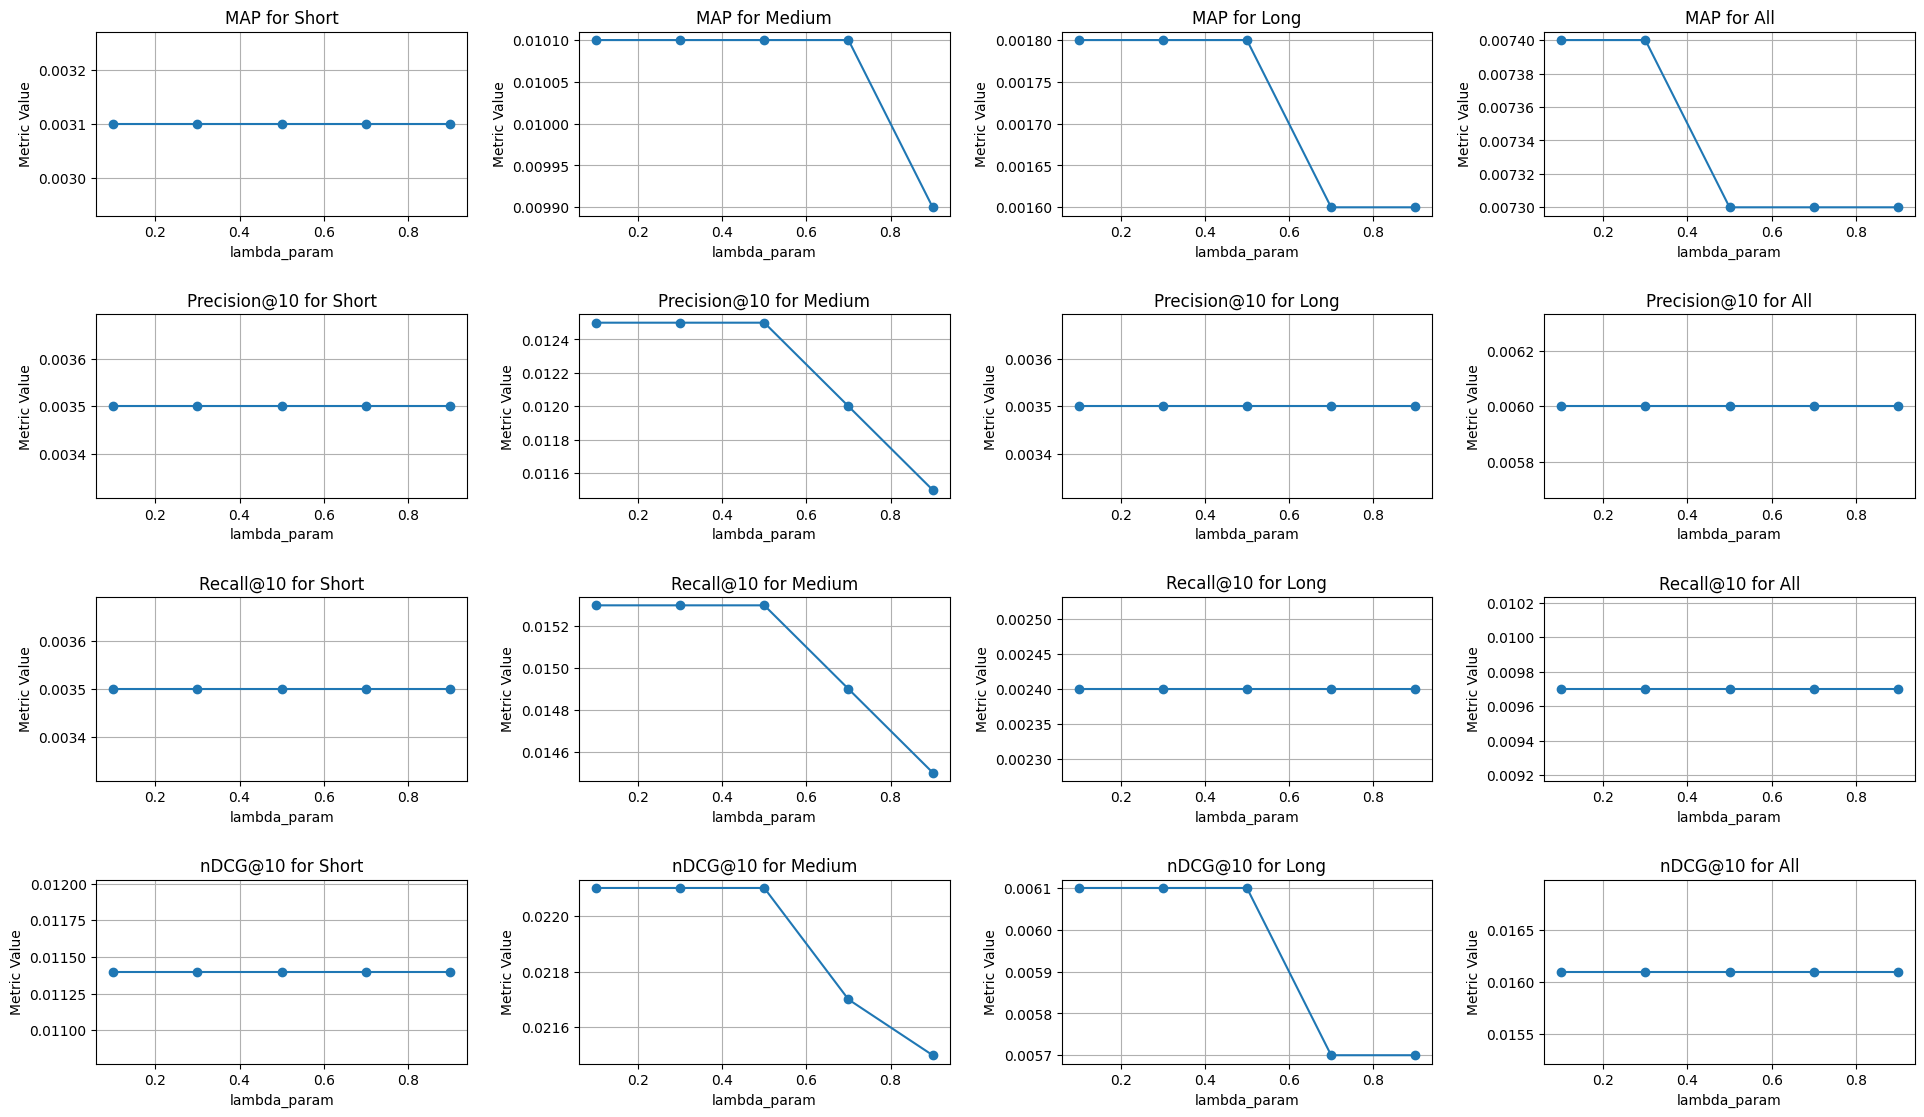

In [ ]:
lambda_values = [0.1, 0.3, 0.5, 0.7, 0.9]
jm_results = handler.param_sweep_for_categories(
    smoothing_method=rm.jelinek_mercer_score,
    param_name="lambda_param",
    param_values=lambda_values,
    method_name="Jelinek-Mercer"
)

<div dir="rtl">

### پاسخ به پرسش‌ها

#### 2. **در کدام گروه روش‌های هموارسازی عملکرد بهتری دارند؟**

از نتایج مشاهده‌شده، **گروه اسناد متوسط** بهترین عملکرد را در روش‌ هموارسازی  **Jelinek-Mercer** نشان داد. در این گروه، نتایج **MAP** و **nDCG@10** با مقادیر مختلف `lambda_param` به‌طور چشمگیری بهتر از سایر گروه‌ها بودند. این به این معنی است که اسناد متوسط به دلیل داشتن حجم مناسبی از کلمات و اطلاعات، بیشتر از سایر گروه‌ها از هموارسازی بهره می‌برند و مدل توانسته است نتایج بهتری از خود نشان دهد.

در مقابل، در **اسناد کوتاه** و **اسناد بلند**، تأثیر هموارسازی به‌طور مؤثری مشاهده نشد، زیرا اسناد کوتاه معمولاً اطلاعات و کلمات کمی دارند و اسناد بلند به دلیل پیچیدگی‌های بیشتر، هموارسازی را نمی‌توانند به‌طور مؤثری بهره‌برداری کنند.

#### 3. **چه تفاوتی بین طول و شدت هموارسازی (بایاس هموارسازی) وجود دارد؟**

تفاوت‌های اصلی بین **طول سند** و **شدت هموارسازی** به شرح زیر است:

* **اسناد کوتاه**: در اسناد کوتاه (کمتر از ۵۰ کلمه)، مدل با مشکل کمبود اطلاعات مواجه است. در این نوع اسناد، هموارسازی تأثیر زیادی ندارد چرا که هموارسازی بیشتر برای جبران کمبود داده‌ها و اصطلاحات در اسناد طولانی‌تر طراحی شده است. بنابراین، **شدت هموارسازی** در این دسته از اسناد کم است و مدل قادر به بهبود رتبه‌بندی نمی‌شود.

* **اسناد متوسط**: در اسناد با طول متوسط، هموارسازی عملکرد بهتری دارد. این اسناد معمولاً تعادل خوبی از کلمات و اطلاعات دارند و هموارسازی می‌تواند کمک کند تا مدل به نتایج دقیق‌تری دست یابد. **شدت هموارسازی** در این اسناد می‌تواند از تغییرات `lambda_param` بهره‌مند شود و عملکرد مدل را بهبود بخشد.

* **اسناد بلند**: در اسناد بلند (بیش از ۱۵۰ کلمه)، به دلیل پیچیدگی بالا و تنوع بیشتر کلمات، **شدت هموارسازی** ممکن است منجر به **بایاس هموارسازی** شود. یعنی هموارسازی بیش از حد می‌تواند مدل را از دقت در رتبه‌بندی صحیح اسناد بازدارد. در این دسته از اسناد، هموارسازی بیشتر به دلیل حجم زیاد اطلاعات و تنوع کلمات تأثیر منفی می‌گذارد و مدل به‌طور مؤثری نتایج را بهبود نمی‌بخشد.

در نهایت، **هموارسازی برای اسناد با طول متوسط** بیشترین تأثیر را داشته و **برای اسناد کوتاه و بلند** باعث کاهش عملکرد یا عدم تغییر قابل توجهی در نتایج می‌شود.

</div>


<div dir="rtl">

### روش Dirichlet Prior

این روش هموارسازی با استفاده از **پیشین دیریکله** انجام می‌شود.  
ایده اصلی این است که تعداد رخدادهای کلمات در سند با یک مقدار پیشین از کل مجموعه ترکیب شود:

<p dir="rtl">
- تعداد رخداد کلمه در سند: \(c(w,d)\)
</p>
<p dir="rtl">
- طول سند: \(|d|\)
</p>
<p dir="rtl">
- پارامتر هموارسازی: \(\mu\)
</p>

<br>

$$
P(w|d) = \frac{c(w,d) + \mu \cdot P(w|C)}{|d| + \mu}
$$

<br>

</div>

<p dir="rtl">
این روش باعث می‌شود اسناد کوتاه بیشتر تحت تأثیر مجموعه کلی قرار بگیرند،  
در حالی که اسناد بلندتر بیشتر به محتوای خودشان متکی باشند.
</p>


<div dir="rtl">

## تحلیل عملکرد مدل Dirichlet Prior با مقادیر مختلف `mu`

### اسناد کوتاه  
در اسناد کوتاه، نمودارها نشان می‌دهند که هرچه مقدار `mu` بیشتر شود، کیفیت رتبه‌بندی افت می‌کند. دلیلش روشن است: وقتی طول سند کوچک است، مخرج فرمول \(|d| + \mu\) خیلی سریع تحت سلطه‌ی `mu` قرار می‌گیرد و سهم واقعی سند در محاسبه احتمال واژه‌ها کم‌رنگ می‌شود. در نتیجه مدل بیشتر به توزیع مجموعه \(P(w|C)\) تکیه می‌کند و سیگنال‌های خاص سند از بین می‌روند. همین موضوع باعث می‌شود MAP و nDCG@10 در مقدار پایین مثل `mu = 500` بیشترین مقدار را داشته باشند و Precision@10 و Recall@10 هم در همین بازه بهتر عمل کنند. بنابراین برای اسناد کوتاه، انتخاب مقادیر پایین `mu` منطقی‌تر است.


### اسناد متوسط  
در اسناد متوسط، طول سند بزرگ‌تر است و همین باعث می‌شود سهم سند در فرمول پایدارتر باشد. مشاهدات نشان می‌دهند که در بازه‌ی `mu = 500 تا 1000` کیفیت رتبه‌بندی (MAP و nDCG@10) خوب است، اما با افزایش بیشتر `mu` روند نزولی آغاز می‌شود. دلیلش این است که وقتی `mu` خیلی بزرگ شود، وزن مجموعه غالب می‌شود و ویژگی‌های خاص سند محو می‌شوند. Precision@10 و Recall@10 در این بازه تقریباً ثابت‌اند، چون فهرست نتایج کلی تغییر زیادی نمی‌کند. نتیجه این است که برای اسناد متوسط، انتخاب مقدار میانی برای `mu` بهترین تعادل بین دقت، پوشش و کیفیت رتبه‌بندی را ایجاد می‌کند.


### اسناد بلند  
در اسناد بلند، نمودارها نشان می‌دهند که تغییرات `mu` تقریباً بی‌اثر است. MAP و nDCG@10 در مقدار پایین کمی بهتر هستند، اما تفاوت‌ها جزئی‌اند و Precision@10 و Recall@10 تقریباً ثابت باقی می‌مانند. دلیل این رفتار در فرمول مشخص است: وقتی طول سند خیلی بزرگ باشد، مخرج \(|d| + \mu\) تحت سلطه‌ی \(|d|\) قرار می‌گیرد و سهم `mu` کوچک می‌شود. بنابراین تغییرات `mu` تأثیر چندانی بر توزیع نهایی ندارد. این موضوع نشان می‌دهد که Dirichlet Prior برای اسناد بلند محدودیت دارد و برای بهبود نتایج باید از روش‌های مکمل یا مدل‌های ترکیبی استفاده کرد.


### کل مجموعه اسناد  
وقتی کل مجموعه بررسی می‌شود، رفتار ترکیبی از سه گروه دیده می‌شود. مشاهدات نشان می‌دهند که MAP و nDCG@10 در بازه‌ی `mu = 1000 تا 2000` بیشینه‌اند و Precision@10 و Recall@10 نیز در همین بازه عملکرد مناسبی دارند. از نظر فرمولی، این بازه نقطه‌ای است که سهم سند و سهم مجموعه به شکلی متعادل ترکیب می‌شوند؛ نه آن‌قدر کوچک که نویز اسناد کوتاه غالب شود و نه آن‌قدر بزرگ که سیگنال‌های سندی محو شوند. بنابراین برای تنظیم عمومی، انتخاب مقدار میانی برای `mu` بهترین گزینه است.


### جمع‌بندی  
ترکیب مشاهدات و فرمول نشان می‌دهد که در اسناد کوتاه، افزایش `mu` به‌سرعت سیگنال‌های سند را از بین می‌برد و بهترین عملکرد در مقادیر پایین (۵۰۰ تا ۱۰۰۰) دیده می‌شود. در اسناد متوسط، بازه‌ی میانی همین محدوده بهترین تعادل را ایجاد می‌کند. در اسناد بلند، تغییرات `mu` اثر کمی دارد و متریک‌ها تقریباً ثابت‌اند. در کل مجموعه، انتخاب مقدار میانی (۱۰۰۰ تا ۲۰۰۰) منطقی‌تر است و عملکرد عمومی را بهینه می‌کند. به‌طور کلی، هرچه سند کوتاه‌تر باشد، حساسیت به `mu` بیشتر است و هرچه سند بلندتر باشد، اثر `mu` کمتر می‌شود.

</div>

Evaluating Dirichlet Prior with mu = 500
Results for Dirichlet Prior (mu=500) on short documents:
{'MAP': 0.0044, 'MRR': 0.0177, 'Precision@3': 0.0067, 'Precision@10': 0.0065, 'Recall@3': 0.002, 'Recall@10': 0.0061, 'nDCG@10': 0.017}
Results for Dirichlet Prior (mu=500) on medium documents:
{'MAP': 0.0098, 'MRR': 0.0411, 'Precision@3': 0.0233, 'Precision@10': 0.0095, 'Recall@3': 0.0088, 'Recall@10': 0.0125, 'nDCG@10': 0.0204}
Results for Dirichlet Prior (mu=500) on long documents:
{'MAP': 0.0018, 'MRR': 0.019, 'Precision@3': 0.01, 'Precision@10': 0.004, 'Recall@3': 0.0021, 'Recall@10': 0.0025, 'nDCG@10': 0.007}
Results for Dirichlet Prior (mu=500) on all documents:
{'MAP': 0.0122, 'MRR': 0.0404, 'Precision@3': 0.0233, 'Precision@10': 0.015, 'Recall@3': 0.0084, 'Recall@10': 0.0165, 'nDCG@10': 0.0258}
********************************************************************************
Evaluating Dirichlet Prior with mu = 1000
Results for Dirichlet Prior (mu=1000) on short documents:
{'MAP': 

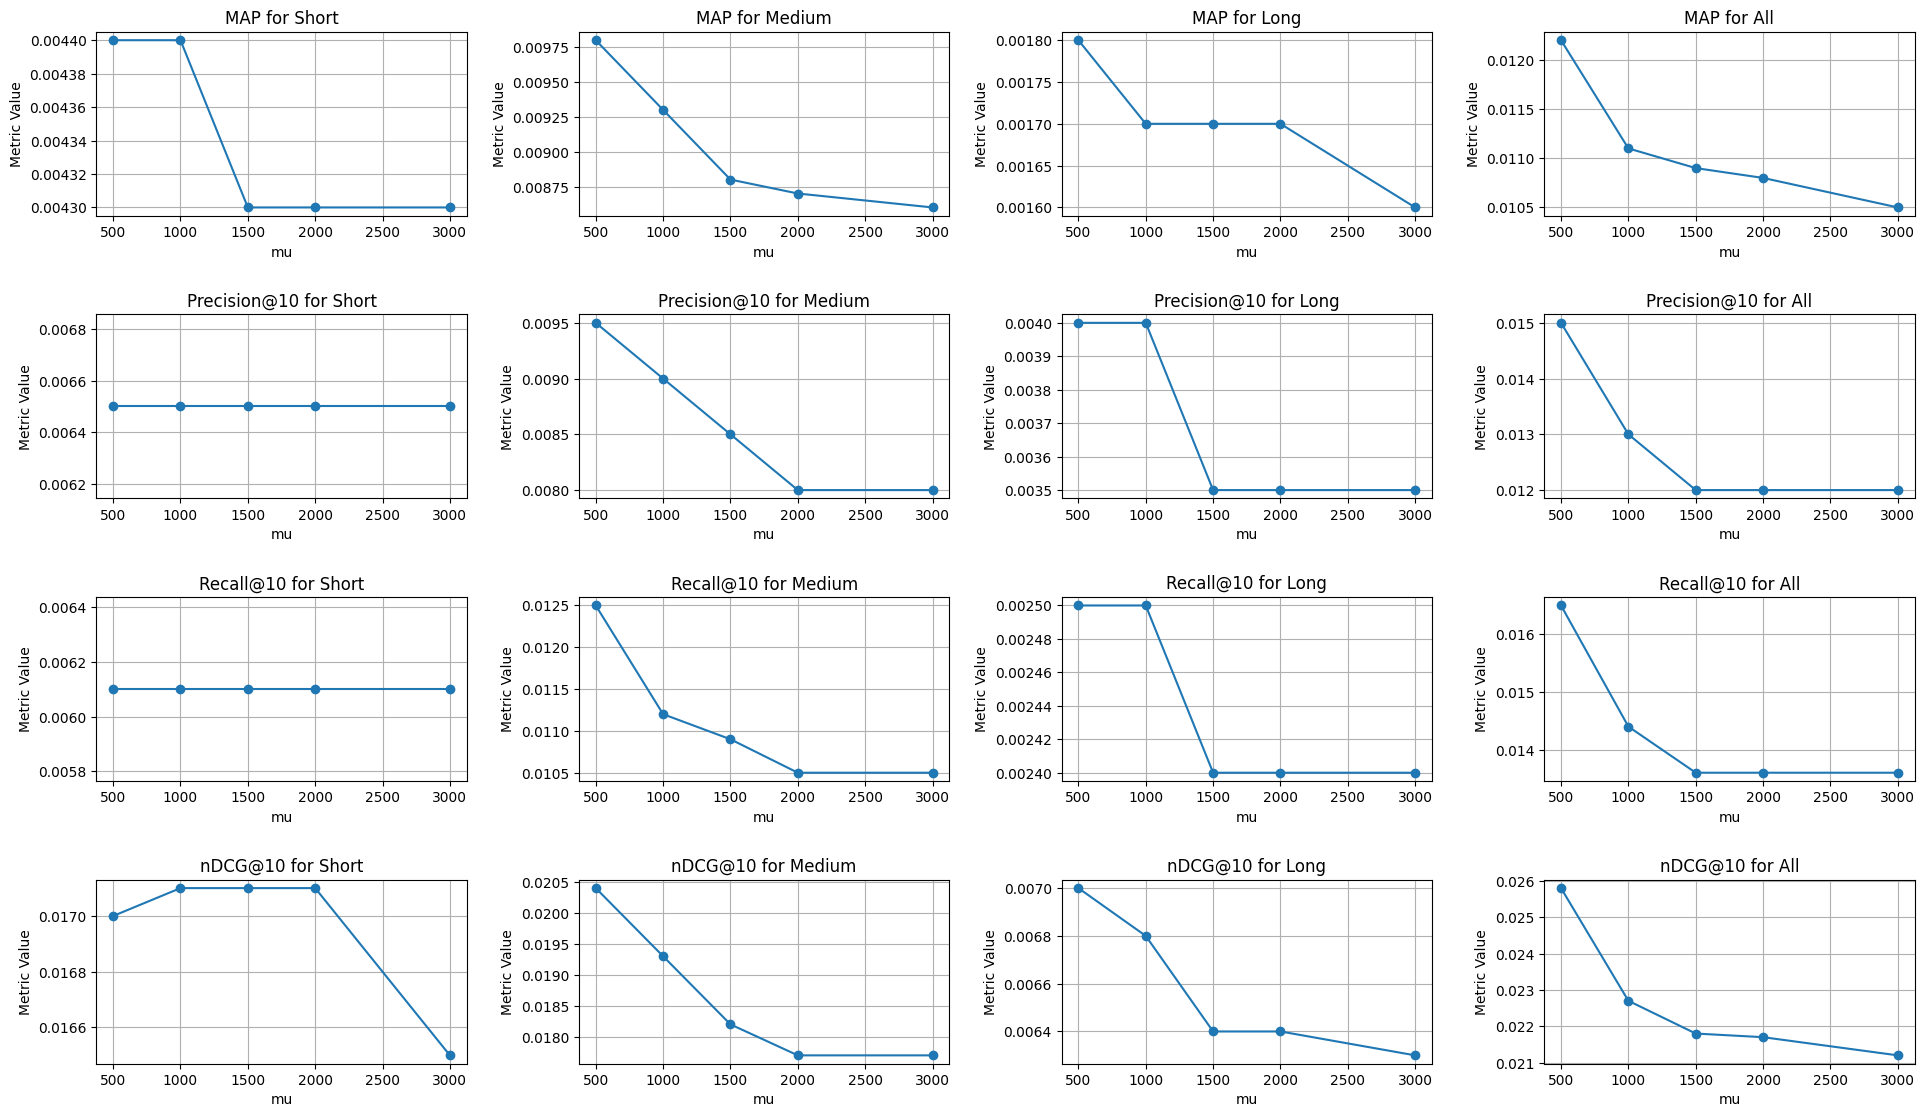

In [ ]:
mu_values = [500, 1000, 1500, 2000, 3000]
dp_results = handler.param_sweep_for_categories(
    smoothing_method=rm.dirichlet_prior_score,
    param_name="mu",
    param_values=mu_values,
    method_name="Dirichlet Prior"
)


<div dir="rtl">

### پاسخ به پرسش‌ها

#### 2. **در کدام گروه روش‌های هموارسازی عملکرد بهتری دارند؟**

در این الگوریتم، **روش هموارسازی Dirichlet Prior** بهترین عملکرد را در **اسناد متوسط** (بین ۵۰ تا ۱۵۰ کلمه) نشان می‌دهد. در این گروه، مقادیر مختلف `mu` باعث تغییرات قابل توجهی در نتایج نمی‌شوند و هموارسازی عملکرد بهتری نسبت به دیگر گروه‌ها دارد. به‌ویژه برای **MAP** و **nDCG@10**، مشاهده می‌شود که هموارسازی برای اسناد متوسط بیشترین تأثیر مثبت را دارد و مدل نتایج بهتری در مقایسه با اسناد کوتاه و بلند ارائه می‌دهد.
همچنین، در **اسناد کوتاه** و **اسناد بلند**، تاثیر هموارسازی کمتر بود و نتایج نسبتاً ثابت ماند. بنابراین، اسناد متوسط به دلیل داشتن تنوع کلمات و اطلاعات بیشتر، بیشترین بهره‌برداری را از هموارسازی می‌کنند.

#### 3. **چه تفاوتی بین طول و شدت هموارسازی (بایاس هموارسازی) وجود دارد؟**

تفاوت‌های اصلی بین **طول سند** و **شدت هموارسازی** (بایاس هموارسازی) به شرح زیر است:

* **اسناد کوتاه**:

  * در اسناد کوتاه (کمتر از ۵۰ کلمه)، هموارسازی به‌طور مؤثری تأثیر نمی‌گذارد. این اسناد معمولاً اطلاعات کمی دارند، بنابراین هموارسازی نمی‌تواند از داده‌های کمی که در اختیار دارد، بهره‌برداری کند. به عبارت دیگر، **شدت هموارسازی** در اسناد کوتاه بسیار کم است و تاثیر قابل توجهی در بهبود مدل ندارد.

* **اسناد متوسط**:

  * در اسناد متوسط (بین ۵۰ تا ۱۵۰ کلمه)، هموارسازی عملکرد بهتری دارد. این اسناد تنوع کلمات و اطلاعات بیشتری دارند که باعث می‌شود هموارسازی بتواند اثرگذارتر باشد. در این گروه، تغییرات در مقدار `mu` تأثیر بیشتری بر نتایج دارد و به نظر می‌رسد که **شدت هموارسازی** (بایاس هموارسازی) می‌تواند به‌طور قابل توجهی باعث بهبود دقت و بازیابی اسناد مرتبط شود. با این حال، افزایش بیش از حد `mu` می‌تواند منجر به هموارسازی بیش از حد شود و عملکرد مدل را کاهش دهد.

* **اسناد بلند**:

  * در اسناد بلند (بیش از ۱۵۰ کلمه)، هموارسازی نتایج ضعیفی دارد. اسناد بلند به دلیل پیچیدگی بالای اطلاعات و تنوع زیاد واژگان، هموارسازی نمی‌تواند عملکرد خوبی از خود نشان دهد. **شدت هموارسازی** در این اسناد بسیار بالا است و این می‌تواند منجر به **بایاس هموارسازی** (over-smoothing) شود، جایی که مدل نمی‌تواند به درستی تفاوت‌ها را بین اسناد مرتبط و غیر مرتبط شبیه‌سازی کند. در این گروه، هموارسازی به دلیل پیچیدگی‌های زیاد و حجم بالای اطلاعات عملکرد مناسبی ندارد.

در نهایت، **اسناد متوسط** بیشترین بهره را از هموارسازی می‌برند، در حالی که اسناد کوتاه و بلند با چالش‌های متفاوتی روبه‌رو هستند که تاثیر هموارسازی را محدود می‌کند.

</div>


<div dir="rtl">

### روش Absolute Discounting

در این روش، به‌جای صفر کردن احتمال کلمات دیده‌نشده، بخشی از احتمال کلمات دیده‌شده کم می‌شود و به کلمات دیده‌نشده اختصاص داده می‌شود:

<p dir="rtl">
- فراوانی کلمه در سند: \(P(w,d)\)  
</p>
<p dir="rtl">
- طول سند: \(|d|\)
</p>
<p dir="rtl">
- تعداد کلمات یکتای سند: \(|d|_u\)  
</p>
<p dir="rtl">
- پارامتر تخفیف: \(\delta\)
</p>

</div>

<br>

$$
P(w|d) = \frac{\max(P(w,d) - \delta, 0)}{|d|} + \frac{\delta \cdot |d|_u}{|d|} \cdot P(w|C)
$$

<br>

<p dir="rtl">
این روش تعادلی بین کلمات دیده‌شده و دیده‌نشده برقرار می‌کند و باعث می‌شود همه کلمات احتمال غیر صفر داشته باشند.
</p>


<div dir="rtl">

## تحلیل عملکرد مدل Absolute Discounting با ترکیب فرمول و مشاهدات

### اسناد کوتاه  
در اسناد کوتاه، هم فرمول و هم نمودارها یک پیام مشترک دارند: افزایش `delta` به‌طور مستقیم کیفیت رتبه‌بندی را بهتر می‌کند. چون طول سند کوچک است، هر بار که از احتمال کلمات دیده‌شده کم می‌شود، سهم قابل توجهی به کلمات دیده‌نشده داده می‌شود. این موضوع باعث می‌شود کلمات مرتبطی که در سند کوتاه حضور ندارند، شانس بیشتری برای ظاهر شدن در نتایج داشته باشند. مشاهدات هم این تحلیل را تأیید می‌کنند؛ MAP و nDCG@10 در مقدار بالای `delta = 0.9` بیشینه‌اند و Precision@10 و Recall@10 نیز در همین نقطه بهتر عمل کرده‌اند. بنابراین برای اسناد کوتاه، انتخاب مقادیر بزرگ‌تر `delta` بهترین گزینه است.


### اسناد متوسط  
در اسناد متوسط، فرمول نشان می‌دهد که با بزرگ‌تر شدن طول سند، تخفیف روی مجموعه‌ای بزرگ‌تر از کلمات یکتا پخش می‌شود و اثر آن کمتر محسوس است. مشاهدات هم همین را نشان می‌دهند: MAP در مقادیر بالاتر کمی بهبود دارد، اما nDCG@10 در مقادیر پایین‌تر بهتر است. این یعنی اگرچه افزایش `delta` می‌تواند کمک کند، اما رتبه‌بندی دقیق‌تر در مقادیر پایین‌تر حفظ می‌شود. Precision@10 و Recall@10 تقریباً ثابت‌اند، چون فهرست نتایج کلی تغییر زیادی نمی‌کند. نتیجه این است که در اسناد متوسط، انتخاب `delta` میانی یا بالاتر تعادل خوبی ایجاد می‌کند، بدون اینکه افت جدی رخ دهد.


### اسناد بلند  
در اسناد بلند، فرمول نشان می‌دهد که چون طول سند خیلی بزرگ است، بخش تخفیف \(\frac{\delta \cdot |d|_u}{|d|}\) نسبت به کل احتمال‌ها کوچک می‌شود و تغییرات `delta` اثر کمی دارد. نمودارها هم همین را تأیید می‌کنند: MAP و nDCG@10 در سطح پایینی باقی مانده‌اند و Precision@10 و Recall@10 تقریباً ثابت‌اند. این یعنی Absolute Discounting برای اسناد بلند کارایی محدودی دارد؛ تخفیف در مقیاس بزرگ سند گم می‌شود و نمی‌تواند رتبه‌بندی را بهبود دهد. بنابراین برای این دسته از اسناد باید به روش‌های مکمل یا مدل‌های پیچیده‌تر فکر کرد.


### کل مجموعه اسناد  
وقتی کل مجموعه بررسی می‌شود، اثر ترکیبی از کوتاه و متوسط غالب است. فرمول نشان می‌دهد که افزایش `delta` احتمال بیشتری به کلمات دیده‌نشده می‌دهد و مشاهدات هم نشان می‌دهند که MAP و nDCG@10 در مقدار `delta = 0.9` بیشینه‌اند. Precision@10 و Recall@10 نیز در همین نقطه بهتر عمل کرده‌اند. چون اسناد کوتاه و متوسط بخش بزرگی از مجموعه هستند، این تغییر روی کل مجموعه اثر مثبت گذاشته است. بنابراین برای یک مقدار عمومی، انتخاب مقادیر بالای `delta` منطقی‌تر است.


### جمع‌بندی  
ترکیب فرمول و مشاهدات نشان می‌دهد که Absolute Discounting در اسناد کوتاه بیشترین سود را دارد، چون تخفیف به‌طور محسوس احتمال کلمات دیده‌نشده را بالا می‌برد و رتبه‌بندی بهتر می‌شود. در اسناد متوسط، اثر تخفیف ملایم‌تر است و تعادل بین کلمات سندی و زمینه‌ای حفظ می‌شود. در اسناد بلند، طول زیاد سند باعث می‌شود تغییرات `delta` اثر کمی داشته باشد و متریک‌ها تقریباً ثابت بمانند. در کل مجموعه، چون کوتاه و متوسط غالب‌اند، انتخاب `delta` بالا (حدود ۰.۹) بهترین عملکرد عمومی را فراهم می‌کند.

</div>

Evaluating Absolute Discounting with delta = 0.1
Results for Absolute Discounting (delta=0.1) on short documents:
{'MAP': 0.0031, 'MRR': 0.0097, 'Precision@3': 0.0017, 'Precision@10': 0.003, 'Recall@3': 0.0013, 'Recall@10': 0.0022, 'nDCG@10': 0.0111}
Results for Absolute Discounting (delta=0.1) on medium documents:
{'MAP': 0.0091, 'MRR': 0.0365, 'Precision@3': 0.0217, 'Precision@10': 0.0105, 'Recall@3': 0.0079, 'Recall@10': 0.0126, 'nDCG@10': 0.0199}
Results for Absolute Discounting (delta=0.1) on long documents:
{'MAP': 0.0016, 'MRR': 0.0144, 'Precision@3': 0.01, 'Precision@10': 0.0035, 'Recall@3': 0.0021, 'Recall@10': 0.0024, 'nDCG@10': 0.0057}
Results for Absolute Discounting (delta=0.1) on all documents:
{'MAP': 0.0073, 'MRR': 0.0118, 'Precision@3': 0.005, 'Precision@10': 0.0055, 'Recall@3': 0.0037, 'Recall@10': 0.0085, 'nDCG@10': 0.0158}
********************************************************************************
Evaluating Absolute Discounting with delta = 0.3
Results for Abs

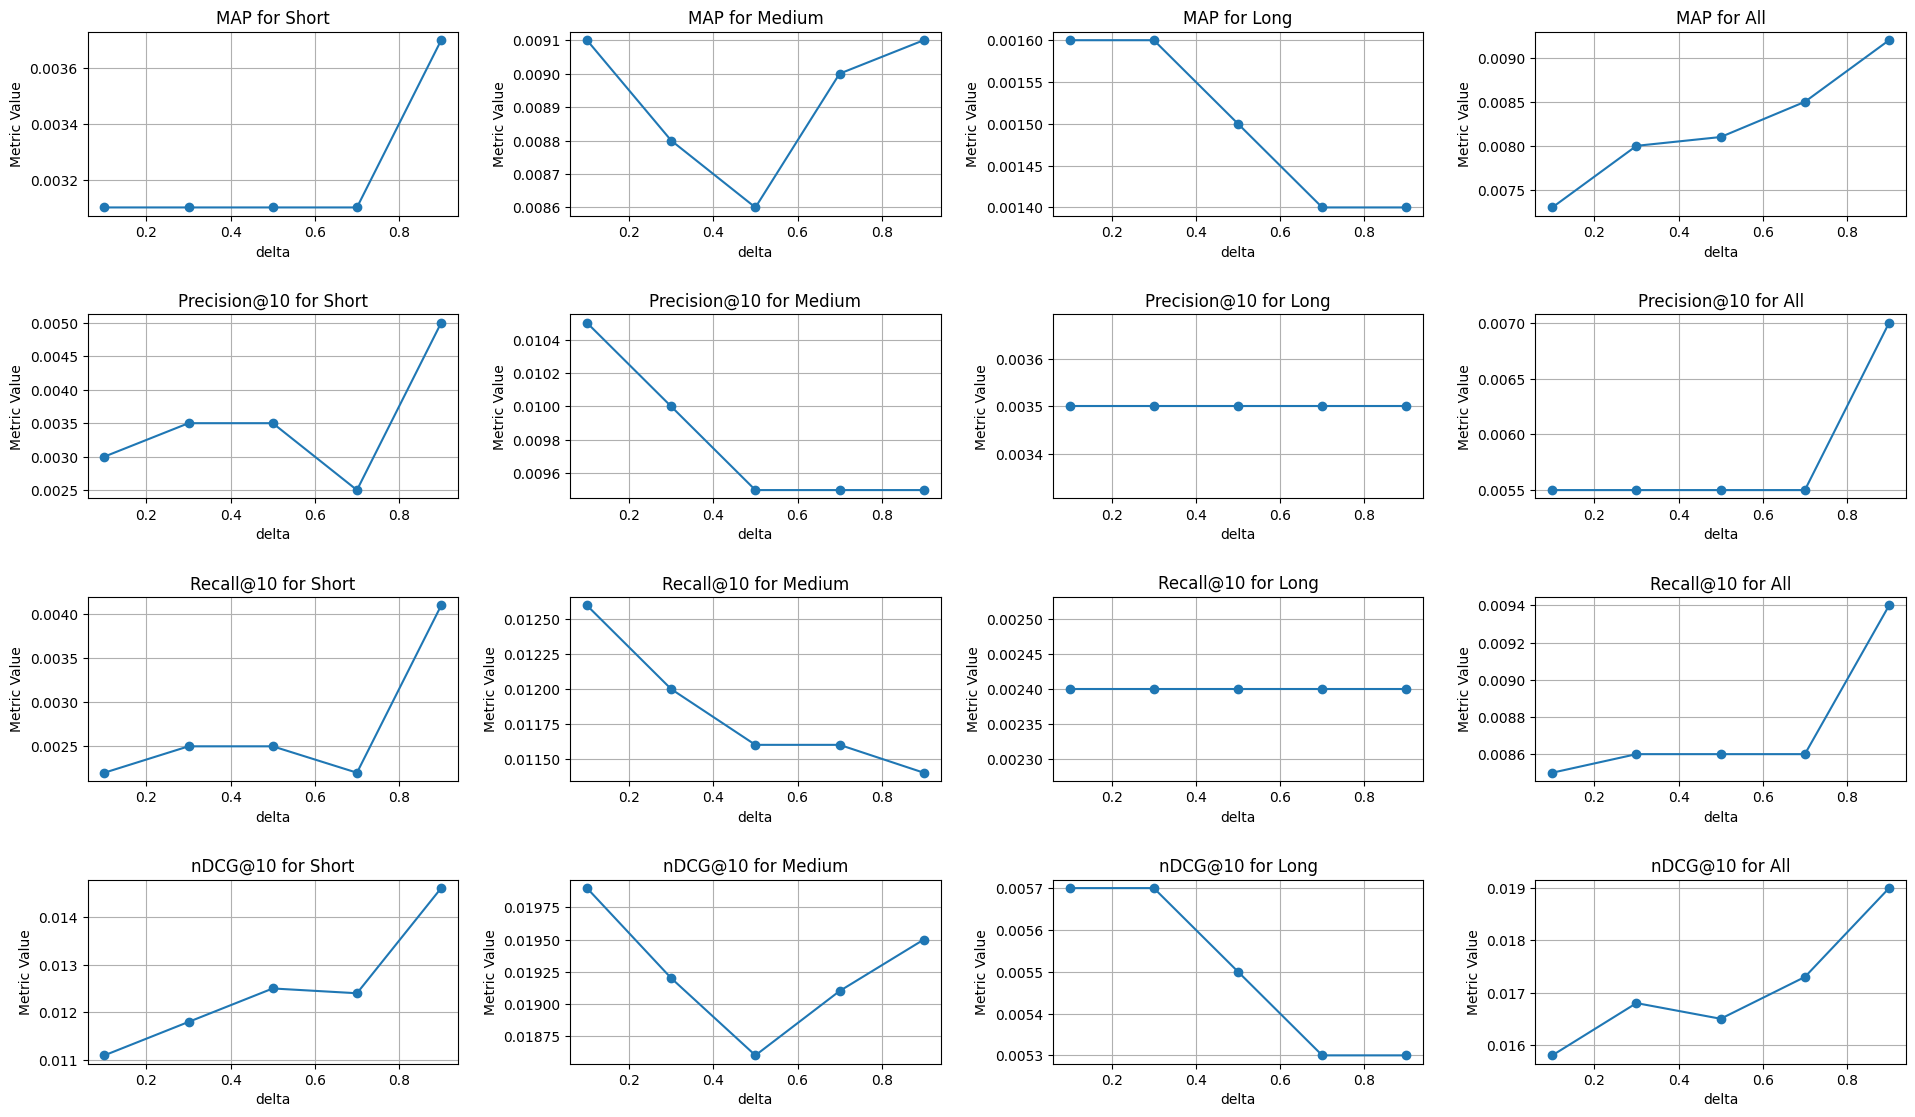

In [ ]:
delta_values = [0.1, 0.3, 0.5, 0.7, 0.9]
ad_results = handler.param_sweep_for_categories(
    smoothing_method=rm.absolute_discounting_score,
    param_name="delta",
    param_values=delta_values,
    method_name="Absolute Discounting"
)

<div dir="rtl">

### پاسخ به پرسش‌ها

#### 2. **در کدام گروه روش‌های هموارسازی عملکرد بهتری دارند؟**

روش هموارسازی **Absolute Discounting** عملکرد بهتری در **اسناد کوتاه** و **اسناد متوسط** داشت. برای **اسناد کوتاه**، افزایش `delta` باعث بهبود عملکرد شد، در حالی که برای **اسناد متوسط** تغییرات در `delta` تأثیر زیادی بر نتایج نداشت، اما همچنان مدل توانست عملکرد قابل قبولی از خود نشان دهد. در مقابل، برای **اسناد بلند**، هموارسازی تأثیر کمی داشت و نتایج ضعیفی مشاهده شد.

#### 3. **چه تفاوتی بین طول و شدت هموارسازی (بایاس هموارسازی) وجود دارد؟**

تفاوت‌های اصلی بین **طول سند** و **شدت هموارسازی** به شرح زیر است:

* **اسناد کوتاه**: در این اسناد، هموارسازی تأثیر مثبتی دارد و **شدت هموارسازی** بالا می‌تواند به مدل کمک کند تا اسناد مرتبط را بهتر بازیابی کند. **بایاس هموارسازی** در این اسناد کم است و هموارسازی به‌طور مؤثری کار می‌کند.

* **اسناد متوسط**: برای اسناد متوسط، هموارسازی نیز کمک‌کننده است، اما **شدت هموارسازی** به حدی نیست که تأثیر چشمگیری در نتایج داشته باشد. مدل توانسته است به دقت نسبی دست یابد، اما تغییرات `delta` به وضوح تأثیر زیادی در بهبود عملکرد نداشته است.

* **اسناد بلند**: در اسناد بلند، **شدت هموارسازی** زیاد می‌تواند باعث **بایاس هموارسازی** شود که عملکرد مدل را کاهش می‌دهد. این اسناد پیچیدگی بیشتری دارند و هموارسازی نمی‌تواند به‌طور مؤثری در بازیابی اطلاعات کمک کند.

### نتیجه‌گیری

* **گروه اسناد کوتاه** بهترین عملکرد را در استفاده از هموارسازی **Absolute Discounting** نشان داد.
* **اسناد بلند** بیشترین چالش را در فرآیند هموارسازی داشتند و عملکرد مدل در این گروه ضعیف بود.
* **افزایش `delta`** منجر به بهبود در **اسناد کوتاه** و **اسناد متوسط** شد، اما تأثیر زیادی در **اسناد بلند** نداشت.

</div>

# **Question 2**

<div dir="rtl">

# الف

<div dir="rtl">

# گروه‌بندی پرس‌وجوها بر اساس واژه‌های نادر

## مقدمه

هدف از این بخش، شناسایی پرس‌وجوهایی است که شامل واژه‌های نادر هستند و دسته‌بندی آن‌ها بر اساس تعداد این واژه‌ها. واژه‌های نادر به واژه‌هایی گفته می‌شود که در کمتر از ۱٪ از اسناد مجموعه ظاهر می‌شوند. اهمیت این دسته‌بندی در تحلیل عملکرد مدل‌های بازیابی اطلاعات است، زیرا وجود واژه‌های نادر می‌تواند باعث تمرکز بیش‌ازحد مدل روی بخش کوچکی از اسناد یا ایجاد مشکل در مدل‌های هم‌راستایی شود. پرس‌وجوها به سه گروه زیر تقسیم شدند:

- **none**: پرس‌وجوهایی که هیچ واژه نادری ندارند.  
- **low**: پرس‌وجوهایی که دارای ۱ یا ۲ واژه نادر هستند.  
- **high**: پرس‌وجوهایی که بیش از ۲ واژه نادر دارند.  

## نتایج

با اجرای کد، پرس‌وجوها بر اساس تعداد واژه‌های نادر دسته‌بندی شدند. آمار به‌دست‌آمده به شرح زیر است:

<table style="width:50%; margin-left:auto; margin-right:auto;">
  <thead>
    <tr>
      <th>گروه</th>
      <th>تعداد پرس‌وجوها</th>
      <th>درصد از کل پرس‌وجوها</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>none</td>
      <td>8</td>
      <td>3.8%</td>
    </tr>
    <tr>
      <td>low</td>
      <td>86</td>
      <td>40.9%</td>
    </tr>
    <tr>
      <td>high</td>
      <td>106</td>
      <td>50.3%</td>
    </tr>
  </tbody>
</table>

## تحلیل نتایج

1. **گروه none**:  
   * تنها ۸ پرس‌وجو در این گروه قرار گرفتند (حدود ۳.۸٪ از کل).  
   * این پرس‌وجوها فاقد واژه‌های نادر هستند و بیشتر شامل واژه‌های عمومی‌اند.  
   * انتظار می‌رود مدل‌های بازیابی در این گروه عملکرد پایدارتر و قابل پیش‌بینی‌تری داشته باشند.  

2. **گروه low**:  
   * شامل ۸۶ پرس‌وجو (حدود ۴۰.۹٪ از کل).  
   * این پرس‌وجوها دارای ۱ یا ۲ واژه نادر هستند.  
   * احتمالاً این گروه تعادلی بین واژه‌های عمومی و خاص دارد و می‌تواند چالش متوسطی برای مدل‌های هموارسازی ایجاد کند.  

3. **گروه high**:  
   * شامل ۱۰۶ پرس‌وجو (حدود ۵۰.۳٪ از کل).  
   * این پرس‌وجوها بیش از ۲ واژه نادر دارند و بیشترین سهم را تشکیل می‌دهند.  
   * این گروه می‌تواند بیشترین چالش را برای مدل‌های بازیابی ایجاد کند، زیرا تمرکز مدل روی واژه‌های نادر ممکن است باعث کاهش پوشش اسناد مرتبط شود.  

## نتیجه‌گیری

نتایج نشان می‌دهد که بیش از نیمی از پرس‌وجوها در گروه **high** قرار دارند و شامل تعداد زیادی واژه نادر هستند. این موضوع اهمیت استفاده از تکنیک‌های گسترش پرس‌وجو (Query Expansion) یا هموارسازی مناسب را برای بهبود عملکرد مدل‌های بازیابی اطلاعات برجسته می‌کند. گروه **low** سهم قابل توجهی دارد و می‌تواند به‌عنوان نقطه‌ی میانی برای تحلیل رفتار مدل‌ها در شرایط متعادل استفاده شود. گروه **none** کوچک‌ترین بخش را تشکیل می‌دهد و بیشتر نمایانگر پرس‌وجوهای عمومی است.

</div>

In [110]:
def identify_rare_terms(inverted_index, threshold=0.01):
    total_docs = len(inverted_index.doc_tokens)
    rare_terms = set()

    for term, doc_freq in inverted_index.term_doc_freq.items():
        if doc_freq / total_docs < threshold:
            rare_terms.add(term)

    return rare_terms


def group_queries_by_rare_terms(queries, inverted_index, rare_terms):
    groups = {'none': [], 'low': [], 'high': []}

    for query in queries:
        rare_word_count = sum(1 for term in query.tokens if term in rare_terms)

        if rare_word_count == 0:
            groups['none'].append(query)
        elif rare_word_count <= 2:
            groups['low'].append(query)
        else:
            groups['high'].append(query)

    return groups


In [111]:
rare_terms = identify_rare_terms(inverted_index)

grouped_queries = group_queries_by_rare_terms(queries, inverted_index, rare_terms)

print("Group 'none':", len(grouped_queries['none']), "queries")
print("Group 'low':", len(grouped_queries['low']), "queries")
print("Group 'high':", len(grouped_queries['high']), "queries")

Group 'none': 8 queries
Group 'low': 86 queries
Group 'high': 106 queries


In [112]:
print("\n--- 'None' Group Queries ---")
for query in grouped_queries['none']:
    print(query.tokens)

print("\n--- 'Low' Group Queries ---")
for query in grouped_queries['low']:
    print(query.tokens)

print("\n--- 'High' Group Queries ---")
for query in grouped_queries['high']:
    print(query.tokens)


--- 'None' Group Queries ---
['peopl', 'ask', 'question', 'know']
['mean']
['know', 'got']
['sholomist', 'mean']
['citriscid']
['friend', 'buy']
['pterofobia']
['go', 'school', 'real', 'world', 'dont', 'use']

--- 'Low' Group Queries ---
['get', 'concentr', 'onsometh']
['water', 'fall', 'earth', 'round']
['mice', 'get', 'rid', 'human']
['innat', 'immun']
['blaphsemi']
['peopl', 'judg', 'dog', 'look', 'like']
['man', 'rape', 'littl', 'girl']
['stop', 'spread', 'islam']
['patient', 'driver']
['cat', 'headbutt']
['yawn', 'contagi']
['enjoy', 'time', 'alon']
['make', 'car', 'faster']
['peopl', 'drink', 'cuervo', 'tast', 'go', 'come']
['teenag', 'vote']
['hot', 'air', 'rise']
['airplan', 'fli', 'high']
['sentenc', 'mean']
['sun', 'shine']
['keep', 'rabit', 'indoor']
['switch', 'school', 'depress']
['get', 'v', 'ac']
['girl', 'beauti']
['handsew', 'sequin']
['memori']
['get', 'rid', 'pimpl', 'back']
['differ', 'type', 'sin', 'caus']
['wet', 'dream']
['lemonad', 'restaur', 'sometim', 'differ

<div dir="rtl">

# ب

<div dir="rtl">

## اجرای مدل‌های هموارسازی با پارامترهای بهینه روی گروه‌های مختلف پرس‌وجو  

### گروه none  
وقتی پرس‌وجو هیچ واژه نادری نداره، عملاً همه مدل‌ها ضعیف عمل کردن. MAP و Precision@10 تقریباً صفر بودن و Recall هم همینطور. دلیلش واضحه: واژه‌های رایج توی خیلی از اسناد تکرار می‌شن و مدل نمی‌تونه بین اسناد مرتبط و غیرمرتبط فرق بذاره. Dirichlet Prior کمی بهتر بود چون توی فرمولش سهم مجموعه نرم‌تر وارد می‌شه و این باعث شد nDCG@10 کمی بالاتر باشه. Absolute Discounting هم نسبت به Jelinek–Mercer عملکرد بهتری داشت چون بخشی از احتمال واژه‌های پرتکرار رو تخفیف می‌ده و به واژه‌های زمینه‌ای منتقل می‌کنه. ولی در کل نبود واژه‌های متمایز باعث شد هیچ‌کدوم از مدل‌ها نتیجه قابل توجهی نگیرن.  

### گروه low  
اینجا تفاوت‌ها خیلی بیشتر مشخص شد. Dirichlet Prior بهترین عملکرد رو داشت (MAP حدود 0.026 و nDCG@10 حدود 0.056). دلیلش اینه که وقتی چند واژه نادر توی پرس‌وجو هست، سهم سند هنوز معنی‌دار باقی می‌مونه و هموارسازی با مجموعه کمک می‌کنه واژه‌های نادری که توی سند نیستن، احتمال غیر صفر بگیرن. Absolute Discounting هم خوب عمل کرد چون با تخفیف دادن احتمال واژه‌های دیده‌شده، به واژه‌های نادیده‌گرفته‌شده وزن بیشتری می‌ده. Jelinek–Mercer اما ضعیف‌تر بود، چون وزن‌دهی خطی بین سند و مجموعه نمی‌تونه سیگنال‌های ضعیف رو به اندازه کافی تقویت کنه.  


### گروه high  
وقتی پرس‌وجو پر از واژه‌های نادر باشه، همه مدل‌ها افت می‌کنن. MAP تقریباً نزدیک صفر بود، ولی Dirichlet Prior همچنان کمی بهتر از بقیه عمل کرد (MAP حدود 0.0044). دلیلش اینه که Dirichlet Prior با استفاده از توزیع مجموعه می‌تونه برای واژه‌هایی که توی سند نیستن، احتمال غیر صفر تولید کنه. Absolute Discounting هم تلاش می‌کنه سهمی به واژه‌های نادیده بده، ولی وقتی تعداد واژه‌های نادر زیاد باشه، این تخفیف محدود جواب نمی‌ده. Jelinek–Mercer هم عملاً ناتوان بود، چون اگر واژه‌ای توی سند نباشه، احتمالش صفر می‌شه و مدل نمی‌تونه اون رو بازیابی کنه.  


### جمع‌بندی  
به طور کلی، Dirichlet Prior توی همه گروه‌ها بهتر عمل کرد، مخصوصاً در گروه low که تعادل خوبی بین دقت و پوشش داشت. Absolute Discounting در گروه low قابل قبول بود ولی در گروه high افت شدیدی داشت. Jelinek–Mercer در همه گروه‌ها ضعیف‌تر بود، به‌خصوص وقتی واژه‌های نادر زیاد بودن.  

پس می‌شه نتیجه گرفت که برای پرس‌وجوهایی که واژه‌های نادر دارن، مدل‌هایی که هموارسازی تطبیقی یا غیرخطی دارن موفق‌تر هستن. Dirichlet Prior چون سهم سند و مجموعه رو بر اساس طول سند تنظیم می‌کنه، انعطاف بیشتری داره و همین ویژگی باعث شد توی این ارزیابی بهترین عملکرد رو داشته باشه.  

</div>

In [113]:
class QuerySmoothingModelEvaluator:
    def __init__(self, inverted_index, queries, relevance_judgments):
        self.inverted_index = inverted_index
        self.queries = queries
        self.relevance_judgments = relevance_judgments
        self.results = {}

    def evaluate_models(self, models, grouped_queries):
        results = {}
        for model, params in models.items():
            results[model.__name__] = self._evaluate_model(model, grouped_queries, params)
        self.results = results
        return results

    def _evaluate_model(self, model, queries_group, params):
        evaluation_results = {}
        for group, queries in queries_group.items():
            evaluation_results[group] = self._evaluate_queries(model, queries, params)
        return evaluation_results

    def _evaluate_queries(self, model, queries, params):
        return ev.evaluate_scoring_method(
            self.inverted_index,
            scoring_method=model,
            queries=queries,
            relevance_judgments=self.relevance_judgments,
            params=params
        )

    def plot_results(self, results, metrics=["MAP", "Precision@10", "Recall@10", "nDCG@10"]):
        self._plot_metrics_for_each_model(results, metrics)
        plt.tight_layout()
        plt.show()

    def _plot_metrics_for_each_model(self, results, metrics):
        fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 10))
        for i, metric in enumerate(metrics):
            self._plot_metric_for_all_models(axes[i], metric, results)

    def _plot_metric_for_all_models(self, ax, metric, results):
        for model_name, model_results in results.items():
            categories, metric_values = self._extract_metric_values_for_model(model_results, metric)
            ax.plot(categories, metric_values, marker='o', label=f'{model_name} {metric}')
            ax.set_title(f'{metric}')
            ax.set_xlabel('Category and Method')
            ax.set_ylabel(f'{metric} Value')
            ax.legend()

    def _extract_metric_values_for_model(self, model_results, metric):
        categories = list(model_results.keys())
        metric_values = [model_results[category].get(metric, np.nan) for category in categories]
        return categories, metric_values

    def print_results(self, results):
        for model_name, model_results in results.items():
            print(f"\n Results for {model_name}:")
            self._print_model_results(model_results)

    def _print_model_results(self, model_results):
        for category, res in model_results.items():
            print(f"\nCategory: {category}")
            print(res)


Group 'none': 8 queries
Group 'low': 86 queries
Group 'high': 106 queries

 Results for jelinek_mercer_score:

Category: none
{'MAP': 0.0, 'MRR': 0.0001, 'Precision@3': 0.0, 'Precision@10': 0.0, 'Recall@3': 0.0, 'Recall@10': 0.0, 'nDCG@10': 0.0}

Category: low
{'MAP': 0.0157, 'MRR': 0.0245, 'Precision@3': 0.0116, 'Precision@10': 0.014, 'Recall@3': 0.0087, 'Recall@10': 0.0226, 'nDCG@10': 0.0355}

Category: high
{'MAP': 0.0012, 'MRR': 0.0035, 'Precision@3': 0.0, 'Precision@10': 0.0, 'Recall@3': 0.0, 'Recall@10': 0.0, 'nDCG@10': 0.0015}

 Results for dirichlet_prior_score:

Category: none
{'MAP': 0.0001, 'MRR': 0.0004, 'Precision@3': 0.0, 'Precision@10': 0.0, 'Recall@3': 0.0, 'Recall@10': 0.0, 'nDCG@10': 0.0051}

Category: low
{'MAP': 0.0262, 'MRR': 0.0766, 'Precision@3': 0.062, 'Precision@10': 0.0291, 'Recall@3': 0.0232, 'Recall@10': 0.0328, 'nDCG@10': 0.0561}

Category: high
{'MAP': 0.0044, 'MRR': 0.0244, 'Precision@3': 0.0157, 'Precision@10': 0.0047, 'Recall@3': 0.0052, 'Recall@10': 0.

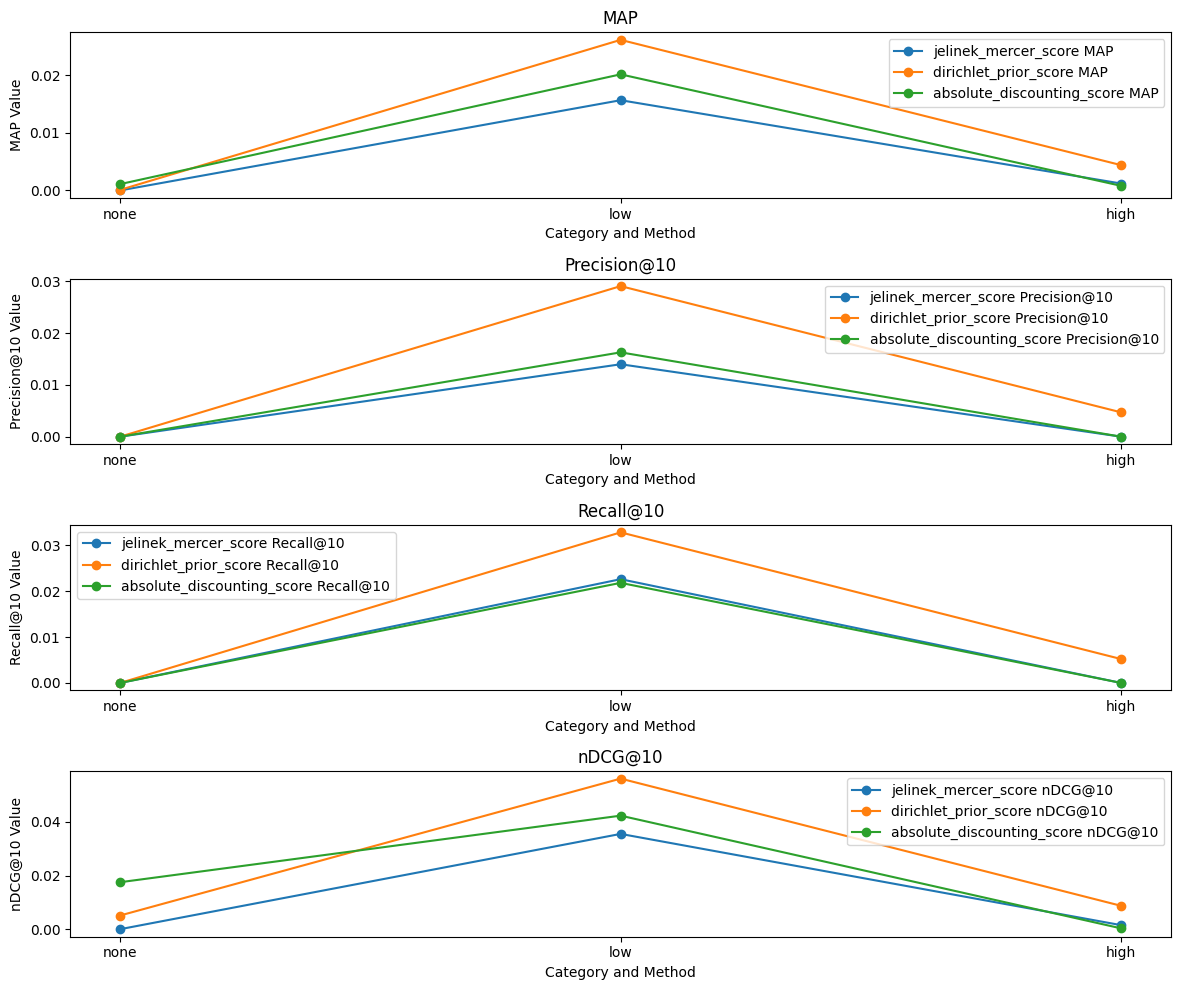

In [114]:

def run_smoothing_evaluation():
    methods_params = {
        rm.jelinek_mercer_score: {"lambda_param": 0.2},
        rm.dirichlet_prior_score: {"mu": 100},
        rm.absolute_discounting_score: {"delta": 0.9},
    }

    rare_terms = identify_rare_terms(inverted_index)
    grouped_queries = group_queries_by_rare_terms(queries, inverted_index, rare_terms)

    print(f"Group 'none': {len(grouped_queries['none'])} queries")
    print(f"Group 'low': {len(grouped_queries['low'])} queries")
    print(f"Group 'high': {len(grouped_queries['high'])} queries")

    evaluator = QuerySmoothingModelEvaluator(
        inverted_index=inverted_index,
        queries=queries,
        relevance_judgments=relevance_judgments
    )

    results = evaluator.evaluate_models(methods_params, grouped_queries)

    evaluator.print_results(results)
    evaluator.plot_results(results)


run_smoothing_evaluation()


<div dir="rtl">

# ج

<div dir="rtl">

## اجرای گسترش پرس‌وجو با روش‌های PRF و مقایسه با مدل‌های هموارسازی  

روش‌های مورد استفاده شامل **Mixture Model PRF**، **Divergence Minimization PRF** و **RM3** بودند. هدف اصلی این بود که بررسی کنیم آیا گسترش پرس‌وجو می‌تواند کیفیت بازیابی را بهبود دهد، به‌ویژه در مقایسه با مدل‌های هموارسازی کلاسیک مثل Jelinek–Mercer، Dirichlet Prior و Absolute Discounting.  


### گروه none  
در این گروه، مدل‌های هموارسازی عملاً ناتوان بودند؛ MAP و Precision نزدیک صفر بودند. دلیلش این است که وقتی پرس‌وجو فقط شامل واژه‌های رایج باشد، مدل‌های هموارسازی نمی‌توانند تمایز ایجاد کنند چون این واژه‌ها در اسناد زیادی تکرار می‌شوند. اما با گسترش پرس‌وجو، به‌ویژه با Mixture Model، نتایج بهتر شدند (MAP = 0.0366، nDCG@10 = 0.0803). این بهبود ناشی از آن است که PRF با نگاه به اسناد اولیه، واژه‌های زمینه‌ای مرتبط را اضافه می‌کند و پرس‌وجو را خاص‌تر می‌سازد. RM3 هم با اینکه MAP پایین‌تری داشت، ولی MRR بالاتر نشان داد که توانسته برخی اسناد مرتبط را در رتبه‌های بالاتر بیاورد.  


### گروه low
اینجا تفاوت چشمگیر بود. مدل‌های هموارسازی MAPهایی حدود 0.02 داشتند، اما Mixture Model توانست MAP را به 0.1788 و nDCG@10 را به 0.3786 برساند. دلیل این جهش روشن است: وقتی پرس‌وجو چند واژه نادر دارد، مدل‌های هموارسازی به‌دلیل اتکا به توزیع کلی مجموعه نمی‌توانند این واژه‌ها را تقویت کنند. در مقابل، PRF با تحلیل اسناد اولیه واژه‌های مرتبط را پیدا می‌کند و به پرس‌وجو اضافه می‌کند. این کار باعث می‌شود واژه‌های نادر با واژه‌های زمینه‌ای ترکیب شوند و احتمال بازیابی اسناد مرتبط بالا برود. Divergence Minimization و RM3 هم عملکرد خوبی داشتند، اما Mixture Model به‌دلیل ترکیب بهتر توزیع سند و مجموعه توانست نتایج دقیق‌تری ارائه دهد.  


### گروه high
در این گروه، مدل‌های هموارسازی تقریباً شکست خوردند؛ MAP نزدیک صفر بود. دلیلش این است که وقتی پرس‌وجو پر از واژه‌های نادر باشد، احتمال حضور این واژه‌ها در اسناد بسیار کم است و مدل‌های هموارسازی نمی‌توانند احتمال غیر صفر معناداری برایشان تولید کنند. اما PRF توانست این ضعف را جبران کند. Mixture Model MAP را به 0.2375 و nDCG@10 را به 0.4363 رساند. این بهبود ناشی از آن است که PRF با نگاه به اسناد اولیه، واژه‌های جایگزین یا مکملی پیدا می‌کند که با پرس‌وجو هم‌جهت هستند. به‌عبارت دیگر، حتی اگر واژه‌های نادر در اسناد نباشند، PRF می‌تواند واژه‌های مرتبطی را وارد پرس‌وجو کند تا مدل بازیابی مسیر درست را پیدا کند. RM3 و Divergence Minimization هم عملکرد قابل قبولی داشتند، اما Mixture Model همچنان بهترین بود چون توزیع ترکیبی‌اش انعطاف بیشتری دارد.  



### نتیجه‌گیری  
- **مدل‌های هموارسازی کلاسیک** در شرایطی که پرس‌وجو واژه‌های نادر دارد یا خیلی کلی است، ضعیف عمل می‌کنند چون فقط روی توزیع واژه‌ها در سند و مجموعه تکیه دارند.  
- **روش‌های PRF** با تحلیل اسناد اولیه می‌توانند واژه‌های مرتبط را به پرس‌وجو اضافه کنند و آن را هوشمندانه‌تر بسازند. این کار باعث می‌شود حتی در شرایط سخت (مثل وجود واژه‌های نادر زیاد) بازیابی بهبود پیدا کند.  
- در بین روش‌های PRF که بررسی کردیم  **Mixture Model** بهترین عملکرد را داشت چون توانست هم MAP و هم nDCG را در همه گروه‌ها به‌طور قابل توجهی افزایش دهد. دلیلش این است که این روش توزیع واژه‌ها را به‌صورت ترکیبی از سند و مجموعه می‌سازد و تعادل خوبی بین واژه‌های اصلی پرس‌وجو و واژه‌های جدید برقرار می‌کند.  


</div>

In [117]:
def expand_and_evaluate_queries(grouped_queries, inverted_index, relevance_judgments, methods_params):
    results = {}

    for category, queries in grouped_queries.items():
        for method, params in methods_params.items():
            expanded_queries = [expand_query(q, method, params, inverted_index) for q in queries]
            bm25_params = {"k": 1.5, "b": 0.75}
            evaluation_result = ev.evaluate_scoring_method(
                inverted_index,
                scoring_method=rm.bm25_score,
                queries=expanded_queries,
                relevance_judgments=relevance_judgments,
                params=bm25_params
            )
            results[f"{category}_{method.__name__}_bm25"] = evaluation_result

    return results


def expand_query(query, method, params, inverted_index):
    expanded_query = method(query, inverted_index, **params)
    if not isinstance(expanded_query, Query):
        expanded_query = Query(query.query_id, ' '.join(expanded_query))
    return expanded_query



In [116]:

methods_params = {
    rm.mixture_model_prf: {"num_expansion_terms": 10, "top_n": 10},
    rm.divergence_minimization_prf: {"num_expansion_terms": 10, "top_n": 10},
    rm.rm3_prf: {"num_expansion_terms": 10, "top_n": 10, "alpha": 0.6},
}

rare_terms = identify_rare_terms(inverted_index)

results_with_expansion = expand_and_evaluate_queries(grouped_queries, inverted_index, relevance_judgments, methods_params)


EM Iterations:  14%|█▍        | 7/50 [00:00<00:00, 2616.07iter/s]


In [122]:
def display_results(results):
    for method, method_results in results.items():
        print(f"\n** Results for {method}:**")
        for category, res in method_results.items():
            print(f"\nCategory: {category}")
            print(res)

In [123]:
display_results(results_with_expansion)


** Results for none_mixture_model_prf_bm25:**

Category: MAP
0.0366

Category: MRR
0.1412

Category: Precision@3
0.0833

Category: Precision@10
0.05

Category: Recall@3
0.0109

Category: Recall@10
0.0241

Category: nDCG@10
0.0803

** Results for none_divergence_minimization_prf_bm25:**

Category: MAP
0.0265

Category: MRR
0.1451

Category: Precision@3
0.0417

Category: Precision@10
0.0375

Category: Recall@3
0.0054

Category: Recall@10
0.0163

Category: nDCG@10
0.058

** Results for none_rm3_prf_bm25:**

Category: MAP
0.0228

Category: MRR
0.1601

Category: Precision@3
0.0833

Category: Precision@10
0.0375

Category: Recall@3
0.0109

Category: Recall@10
0.0187

Category: nDCG@10
0.0576

** Results for low_mixture_model_prf_bm25:**

Category: MAP
0.1788

Category: MRR
0.5388

Category: Precision@3
0.3178

Category: Precision@10
0.2186

Category: Recall@3
0.084

Category: Recall@10
0.1754

Category: nDCG@10
0.3786

** Results for low_divergence_minimization_prf_bm25:**

Category: MAP
0.

# **نکات مهم**

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
    <p><strong>مهلت تحویل بدون جریمه:</strong> ۲۷ آبان ۱۴۰۴</p>
    <p><strong>مهلت تحویل با تاخیر (با جریمه):</strong>۴ آذر ۱۴۰۴</p>
</div>
<h4 dir="rtl" style="font-family: Vazir; width: 85%;">فایل ارسالی شما باید با فرمت زیر نامگذاری شود: <code>IIR_CA2_STUDENTID.ipynb</code></h4>

<h4 dir="rtl" style="font-family: Vazir; width: 85%;">نحوه انجام این تمرین:</h4>
<ul dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;"> <li>برخی سوالات نیاز به نوشتن کد پایتون و محاسبه نتایج دارند کدها بایستی طبق فایل تمرین به طور کامل نوشته شوند.</li> <li> کدها و تفسیرهای هربخش را به طور مشخص در همین نوت‌بوک بنویسید. سعی کنید هربخش به طور مشخصی جداشده باشد و ساختار نوت‌بوک خوانا باشد.</li>  </ul>

<h4 dir="rtl" style="font-family: Vazir; width: 85%;">صداقت علمی:</h4> <ul dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;"> <li>ما نوت‌بوک‌های تعداد مشخصی از دانشجویان که به صورت تصادفی انتخاب می‌شوند، بررسی خواهیم کرد. این بررسی‌ها اطمینان حاصل می‌کنند که کدی که نوشتید واقعاً پاسخ‌های موجود در نوت‌بوک شما را تولید می‌کند. اگر پاسخ‌های صحیح را در نوت‌بوک خود بدون کدی که واقعاً آن پاسخ‌ها را تولید کند تحویل دهید، این یک مورد جدی از عدم صداقت علمی محسوب می‌شود.</li> <li>ما همچنین بررسی‌های خودکاری را برای تشخیص سرقت علمی در نوت‌بوک‌های کولب انجام خواهیم داد. کپی کردن کد از دیگران نیز یک مورد جدی از عدم صداقت علمی محسوب می‌شود.</li> </ul>

<h4 dir="rtl" style="font-family: Vazir; width: 85%;">توضیحات تکمیلی:</h4> <ul dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
<li>
خوانایی و دقت بررسی‌ها در گزارش نهایی از اهمیت ویژه‌ای برخوردار است. به تمرین‌هایی که به صورت کاغذی تحویل داده شوند یا به صورت عکس در سایت بارگذاری شوند، ترتیب اثری داده نخواهد شد.</li>
<li>
 همه‌ی کدهای پیوست گزارش بایستی قابلیت اجرای مجدد داشته باشند. در صورتی که برای اجرا مجدد آن‌ها نیاز به تنظیمات خاصی می‌باشد، بایستی تنظیمات مورد نیاز را نیز در گزارش خود ذکر کنید.  دقت کنید که  تمامی کدها باید توسط شما اجرا شده باشند و نتایج اجرا در فایل کدهای ارسالی مشخص باشد. به کدهایی که نتایج اجرای آن‌ها در فایل ارسالی مشخص نباشد نمره‌ای تعلق نمی‌گیرد.
</li>
<li>
تمرین تا یک هفته بعد از مهلت تعیین شده با تاخیر تحویل گرفته می‌شود. دقت کنید که شما جمعاً برای تمام تکالیف، ۱۴ روز زمان تحویل بدون جریمه دارید که تنها از ۷ روز آن برای هر تمرین می‌توانید استفاده کنید. در صورتی که این ۱۴ روز به اتمام رسیده باشد، به ازای هر روز تاخیر ده درصد جریمه می‌شود.
</li>
<li>توجه کنید این تمرین باید به صورت تک‌نفره انجام شود و پاسخ‌های ارائه شده باید نتیجه فعالیت فرد نویسنده باشد (همفکری و به اتفاق هم نوشتن تمرین نیز ممنوع است). در صورت مشاهده
 تشابه به همه افراد مشارکت‌کننده، نمره تمرین صفر و به استاد گزارش می‌گردد.
 </li>
 <li>برای مطالعه بیشتر درباره‌ی فرمت مارک‌دون می‌توانید از <a href="https://github.com/tajaddini/Persian-Markdown/blob/master/learn-MD.md">این لینک</a> مطالعه کنید.
 </li>

 </ul>
 </div>